# Reading and Understanding data

In [200]:
#import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("always")

In [201]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [202]:
# Reading the csv file
country=pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [203]:
# looking for shape
country.shape

(167, 10)

In [204]:
# looking for types
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [205]:
# checking the mean
country.describe

<bound method NDFrame.describe of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2    

In [206]:
#checking columns
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [207]:
#checking missing values
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Data Preparation

In [208]:
#converting 'exports' in actual values 
country['exports']=round((country['exports']*country['gdpp'])/100,2)

In [209]:
#converting 'health' in actual values
country['health']=round((country['health']*country['gdpp'])/100,2)

In [210]:
#converting 'imports' in actual values
country['imports']=round((country['imports']*country['gdpp'])/100,2)

In [211]:
# checking top 5 values
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


# EDA

#### Barplot

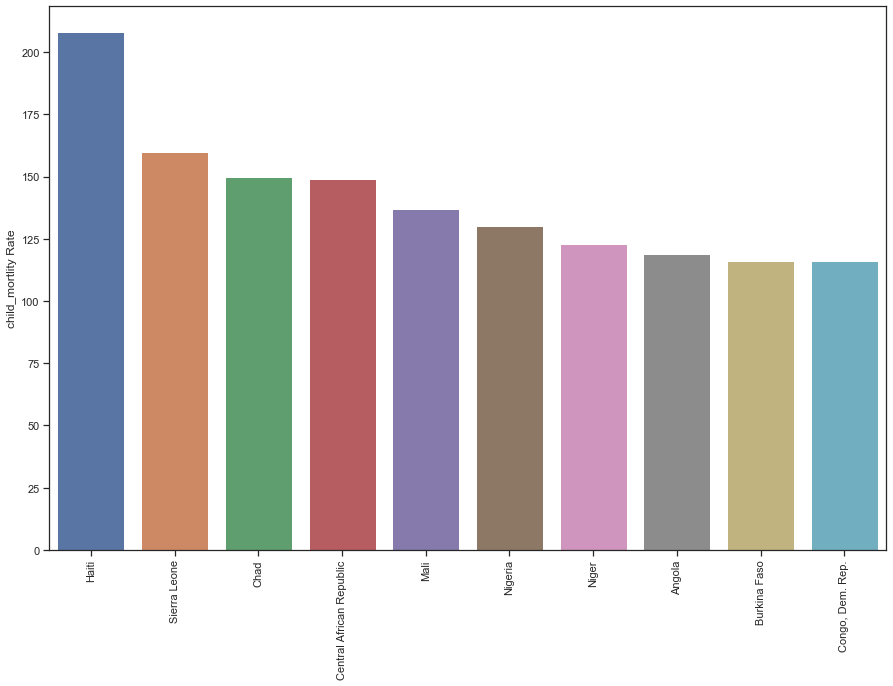

In [212]:
#Perform Analysis for child_mort 
plt.figure(figsize=(15,10))
child_mort=country[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
ax=sns.barplot(x='country',y='child_mort',data=child_mort)
ax.set(xlabel='',ylabel='child_mortlity Rate')
plt.xticks(rotation=90)
plt.show()

The countries having high child mortality Rate according to EDA are:
    Haiti,Sierra Leone, Chad, Central African Republic, Mali, Nigeria, Niger, Angola,Burkina Faso, Congo, Dem. Rep.

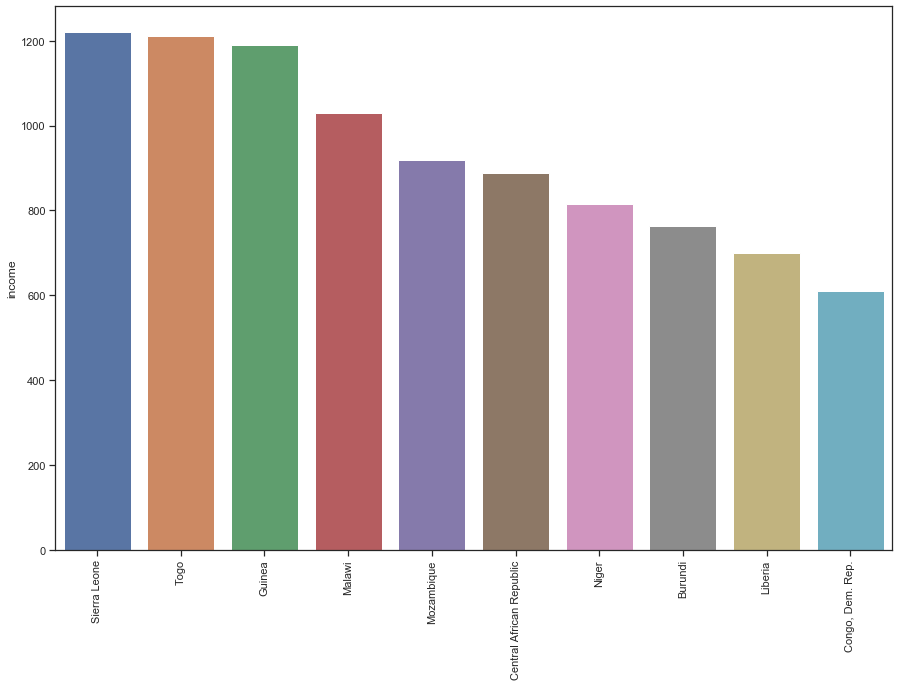

In [213]:
plt.figure(figsize=(15,10))
income=country[['country','income']].sort_values('income',ascending=False).tail(10)
ax=sns.barplot(x='country',y='income',data=income)
ax.set(xlabel='',ylabel='income')
plt.xticks(rotation=90)
plt.show()

The countries having low Income according to EDA are:
    Sierra Leone, Togo, Guinea, Malawi, Mozambique,Central African Republic, Niger, Burundi, Liberia, Congo. Dem. Rep.

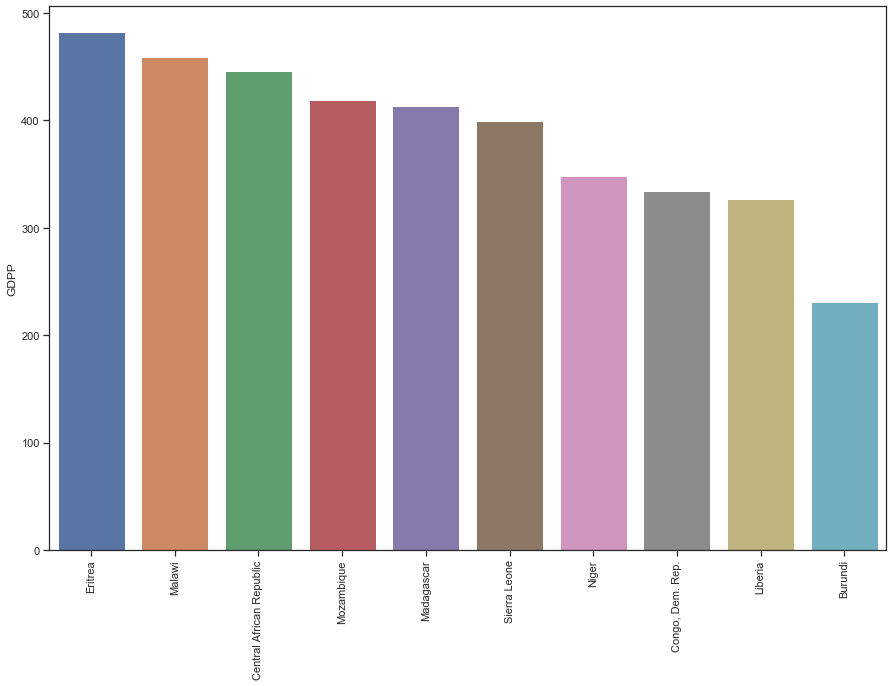

In [214]:
plt.figure(figsize=(15,10))
gdpp=country[['country','gdpp']].sort_values('gdpp',ascending=False).tail(10)
ax=sns.barplot(x='country',y='gdpp',data=gdpp)
ax.set(xlabel='',ylabel='GDPP')
plt.xticks(rotation=90)
plt.show()

The countries having low gdpp according to EDA are:-
Eritrea, Malawi, Central African Republic,Mozambique, Madagascar, Sierra Leone, Niger, Congo, Dem. Rep., Liberia, Burundi

#### Pairplot

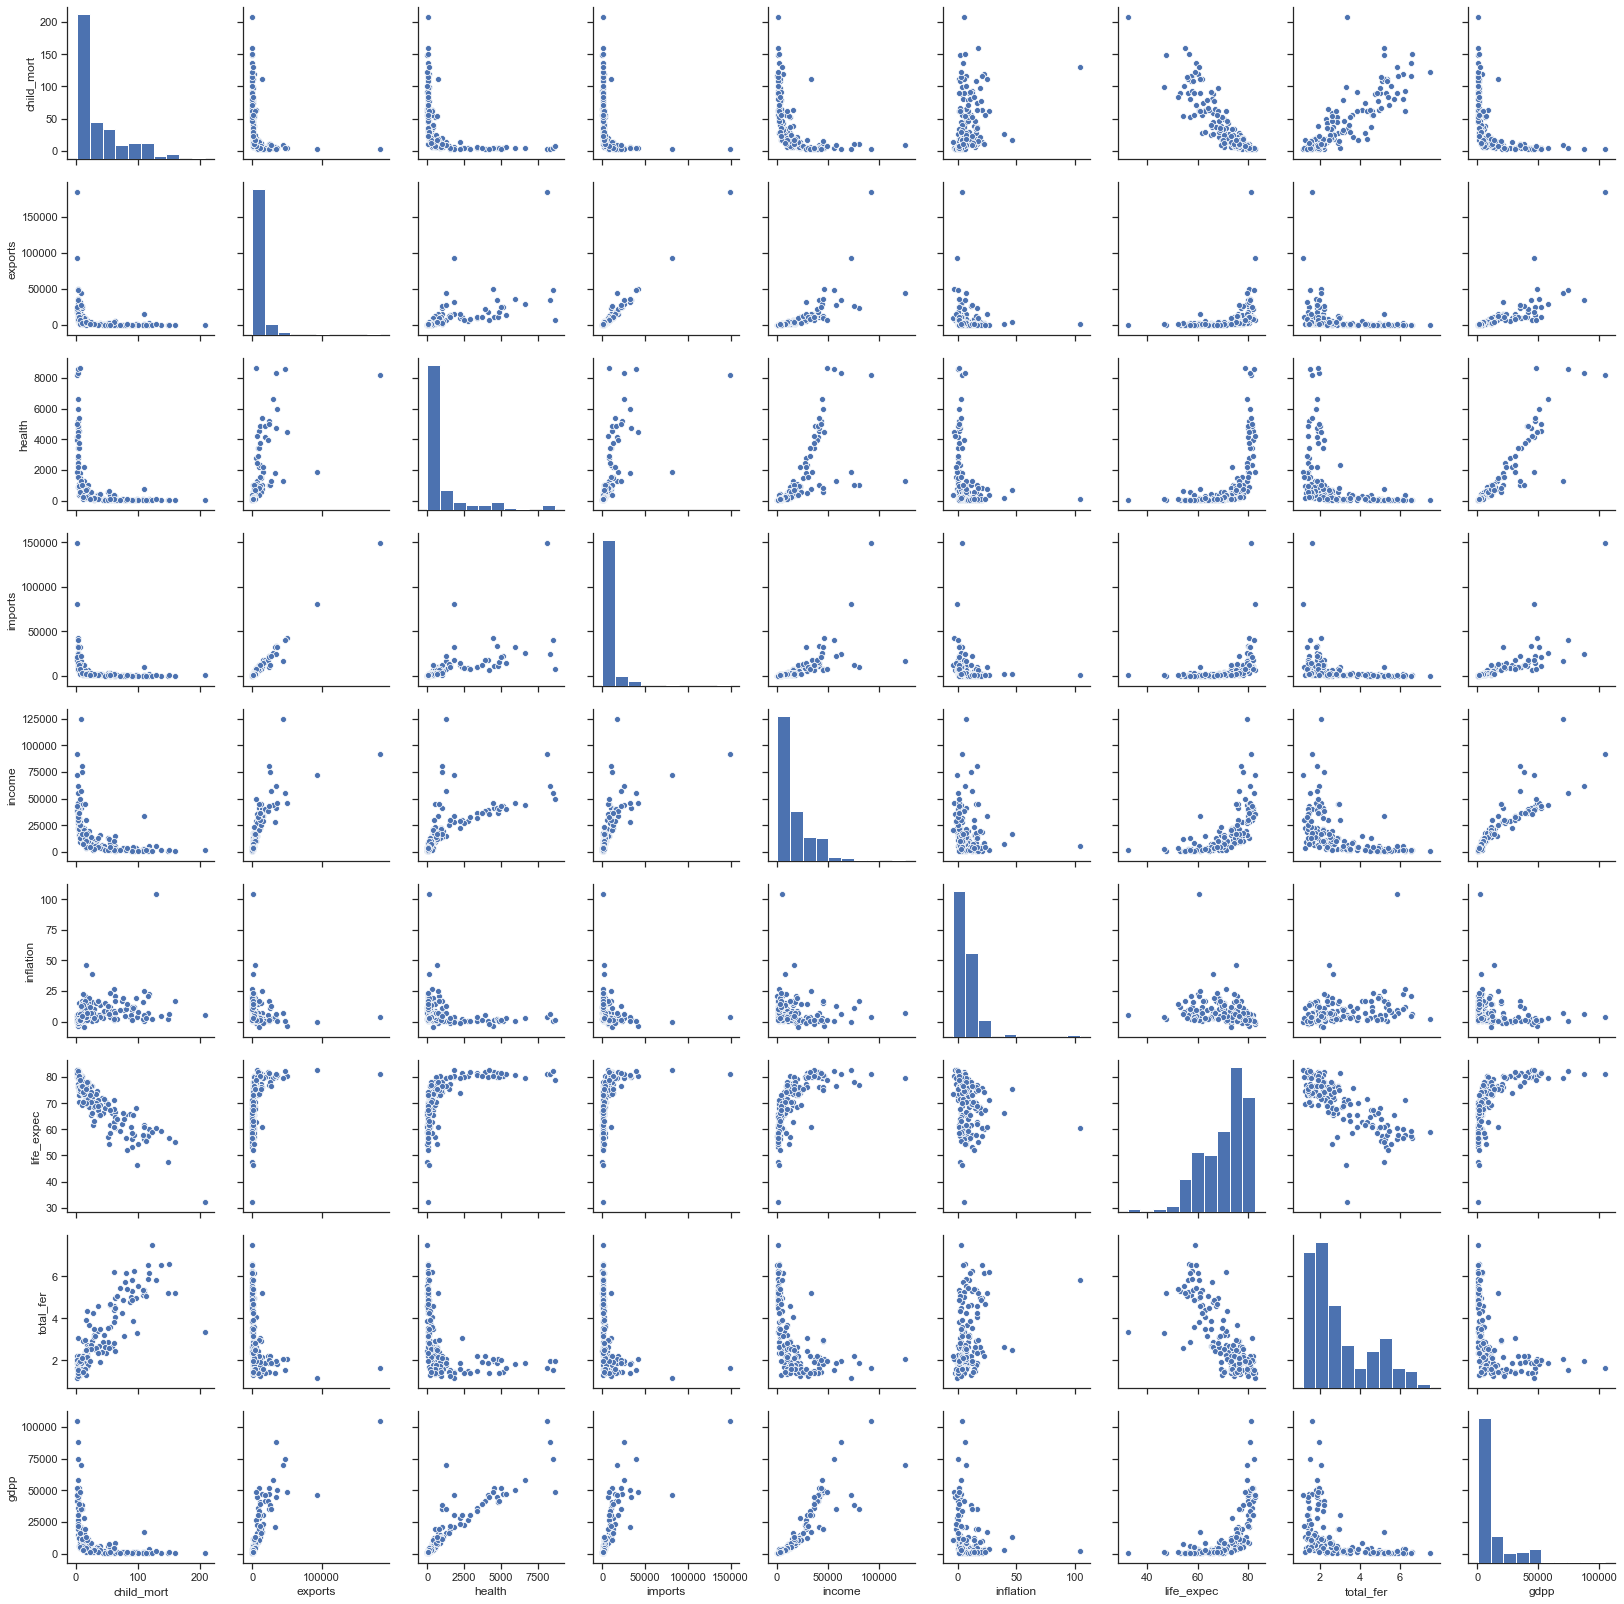

In [215]:
# performing EDA by making pairplots
sns.set(style="ticks", color_codes=True)
sns.pairplot(country)
plt.show()

#### Distplot

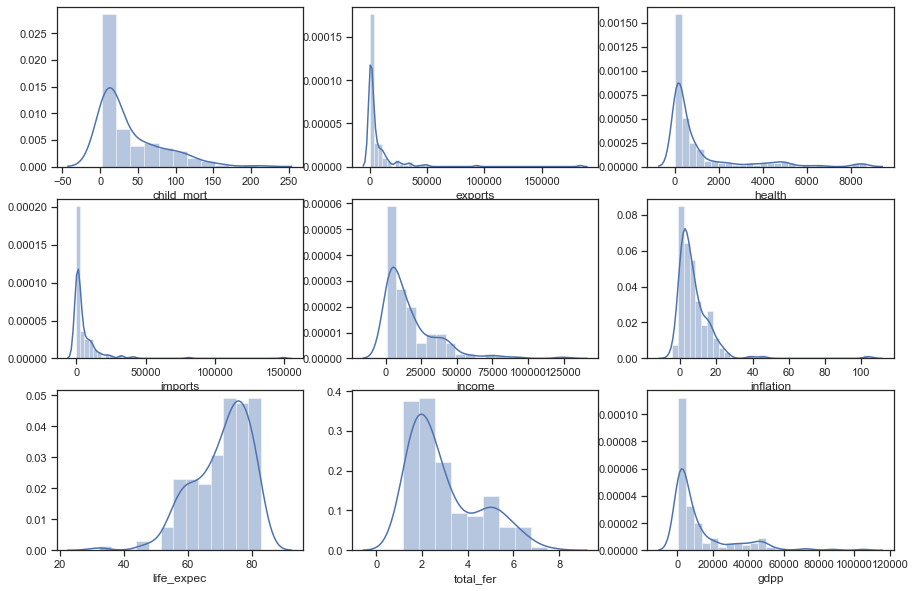

In [216]:
# ploting the distplot
plt.figure(figsize = (15,10))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])

#### Boxplot

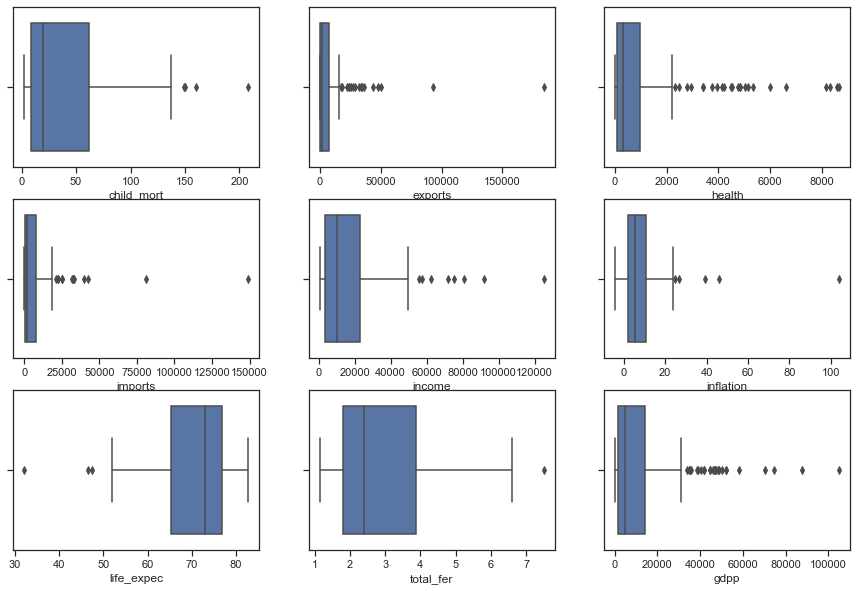

In [217]:
#plotting boxplots
plt.figure(figsize = (15,10))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

# Outlier treatment

#### 1. child_mort

In [218]:
# capping the lower_end outliers from 'child_mort'
q1=country['child_mort'].quantile(0.01)
country['child_mort'][country['child_mort']<=q1] = q1

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 2. exports

In [219]:
#capping upper end outliers from 'exports'
q2=country['exports'].quantile(0.99)
country['exports'][country['exports']>=q2] = q2

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 3. health

In [220]:
#capping upper end outliers from 'health'
q3=country['health'].quantile(0.99)
country['health'][country['health']>=q3] = q3

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 4. imports

In [221]:
#capping upper end outliers from 'imports'
q4=country['imports'].quantile(0.99)
country['imports'][country['imports']>=q4] = q4

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 5. income

In [222]:
#capping upper end outliers from 'income'
q5=country['income'].quantile(0.99)
country['income'][country['income']>=q5] = q5

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 6.Inflation

In [223]:
#capping upper end outliers from 'Inflation'
q6=country['inflation'].quantile(0.99)
country['inflation'][country['inflation']>=q6] = q6

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 7. life_expec

In [224]:
#capping upper end outliers from 'life_expec'.
q7=country['life_expec'].quantile(0.99)
country['life_expec'][country['life_expec']>=q7] = q7

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 8. gdpp

In [225]:
#capping upper end outliers from 'gdpp'.-
q9=country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp']>=q9] = q9

C:\Users\MAhaDev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Clustering

### Hopkins Score

In [226]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [227]:
hopkins(country.drop('country',axis = 1))

0.9644442435394247

In [228]:
#dropping 'country' to analyse the data.
country_new=country.drop('country',axis=1)

# Rescaling

In [229]:
#scaling
scaler=StandardScaler()
country_scaled=scaler.fit_transform(country_new)
country_scaled.shape

(167, 9)

In [230]:
#converting to Dataframe.
country_scaled=pd.DataFrame(country_scaled)
country_scaled.columns=country_new.columns
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566956,-0.598740,-0.851668,0.265002,-1.619705,1.902882,-0.702259
1,-0.538993,-0.473858,-0.440391,-0.413584,-0.386946,-0.372075,0.648831,-0.859973,-0.498726
2,-0.272870,-0.424000,-0.486272,-0.476100,-0.221053,1.122161,0.671403,-0.038404,-0.477434
3,2.007831,-0.381249,-0.534091,-0.463973,-0.612045,1.932987,-1.179541,2.128151,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.541946,-0.032042


#### silhouette score

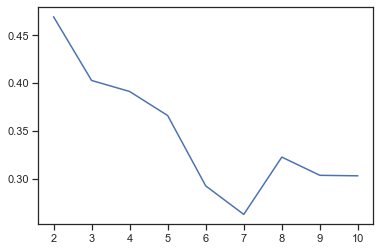

In [231]:
# calculting the silouette score
ssd=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k)  
    kmeans.fit(country_scaled)      #fit the scaled data
    ssd.append([k,silhouette_score(country_scaled,kmeans.labels_)])  #kmeans.labels_
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1]) #plotting the curve

#### Elbow curve

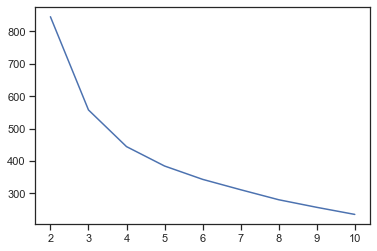

In [232]:
# plotting Elbow curve
ssd = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(country_scaled)   
    ssd.append([k, kmeans.inertia_]) # kmeans.inertia_
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])#plotting the curve

So we are moving ahead with k=3 as from both the curve we are getting k=3.

# Modelling

In [233]:
# with k=3 making the the model
kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [234]:
#cluster labels assigned
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

# Cluster Analysis

In [235]:
# adding the cluster_labels to the main dataset
country['cluster_label']=kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,2


In [236]:
#counting the cluster_labels in the main dataset
country.cluster_label.value_counts()

2    90
0    48
1    29
Name: cluster_label, dtype: int64

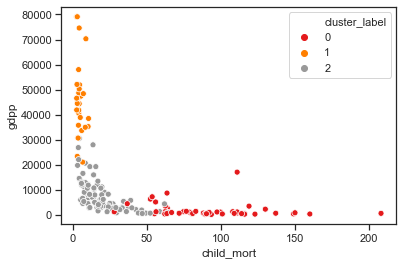

In [237]:
# analysing the clusters formed using scatterplot
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_label', data = country, palette = 'Set1')

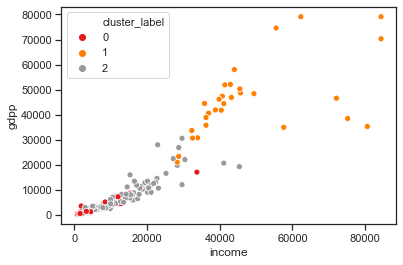

In [238]:
# analysing the clusters formed using scatterplot
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_label', data = country, palette = 'Set1')

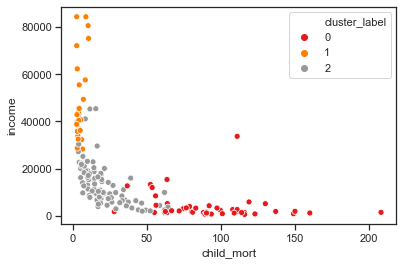

In [239]:
# analysing the clusters formed using scatterplot
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_label', data = country, palette = 'Set1')

In [240]:
# groupping the clusters so formed and finding the mean
country.drop('country',axis = 1).groupby('cluster_label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,91.610417,879.063542,114.822083,827.028750,3897.354167,10.608604,59.239583,4.992083,1909.208333
1,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.453103,1.754138,46068.137931
2,20.547778,3477.015556,528.894111,3588.133556,13804.333333,7.110944,73.393333,2.242444,7808.577778


In [241]:
#getting country columns
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_label'],
      dtype='object')

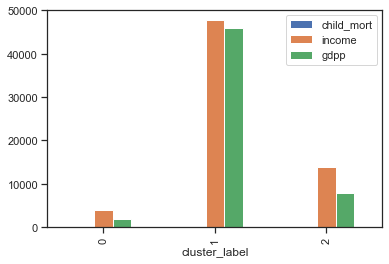

In [242]:
#again group by cluster labels and analysing only child_mort,income,gdpp
country.drop(['country', 'exports', 'health', 'imports',
       'inflation', 'life_expec', 'total_fer'],axis=1).groupby('cluster_label').mean().plot(kind='bar')

# Cluster Profiling

In [243]:
#finding the countries in cluster=0
country[country['cluster_label']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [244]:
# cluster profiling , we need to fing the bottom most countries which are in need of aid.
#giving priority to child_mort'over 'income','gdpp' while sorting
country[country['cluster_label']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.55,708.0,0


In [245]:
# cluster profiling , we need to fing the bottom most countries which are in need of aid.
#giving priority to 'gdpp' over 'income',child_mort' while sorting
country[country['cluster_label']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0


In [246]:
#Thees are the counytries which are really good and top countries in our data set with least child_mortality and very good gdpp and income
country[country['cluster_label']==1].sort_values(by=['child_mort','income','gdpp'],ascending=[True,False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
91,Luxembourg,2.8,64794.26,8158.50,55371.39,84374.0,3.620,81.30,1.63,79088.0,1
133,Singapore,2.8,64794.26,1845.36,55371.39,72100.0,-0.046,82.37,1.15,46600.0,1
68,Iceland,2.8,22374.60,3938.60,18142.70,38800.0,5.470,82.00,2.20,41900.0,1
144,Sweden,3.0,24070.20,5017.23,21204.70,42900.0,0.991,81.50,1.98,52100.0,1
53,Finland,3.0,17879.40,4134.90,17278.80,39800.0,0.351,80.00,1.87,46200.0,1


# Hierchical Clustering

In [247]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566956,-0.598740,-0.851668,0.265002,-1.619705,1.902882,-0.702259
1,-0.538993,-0.473858,-0.440391,-0.413584,-0.386946,-0.372075,0.648831,-0.859973,-0.498726
2,-0.272870,-0.424000,-0.486272,-0.476100,-0.221053,1.122161,0.671403,-0.038404,-0.477434
3,2.007831,-0.381249,-0.534091,-0.463973,-0.612045,1.932987,-1.179541,2.128151,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.541946,-0.032042


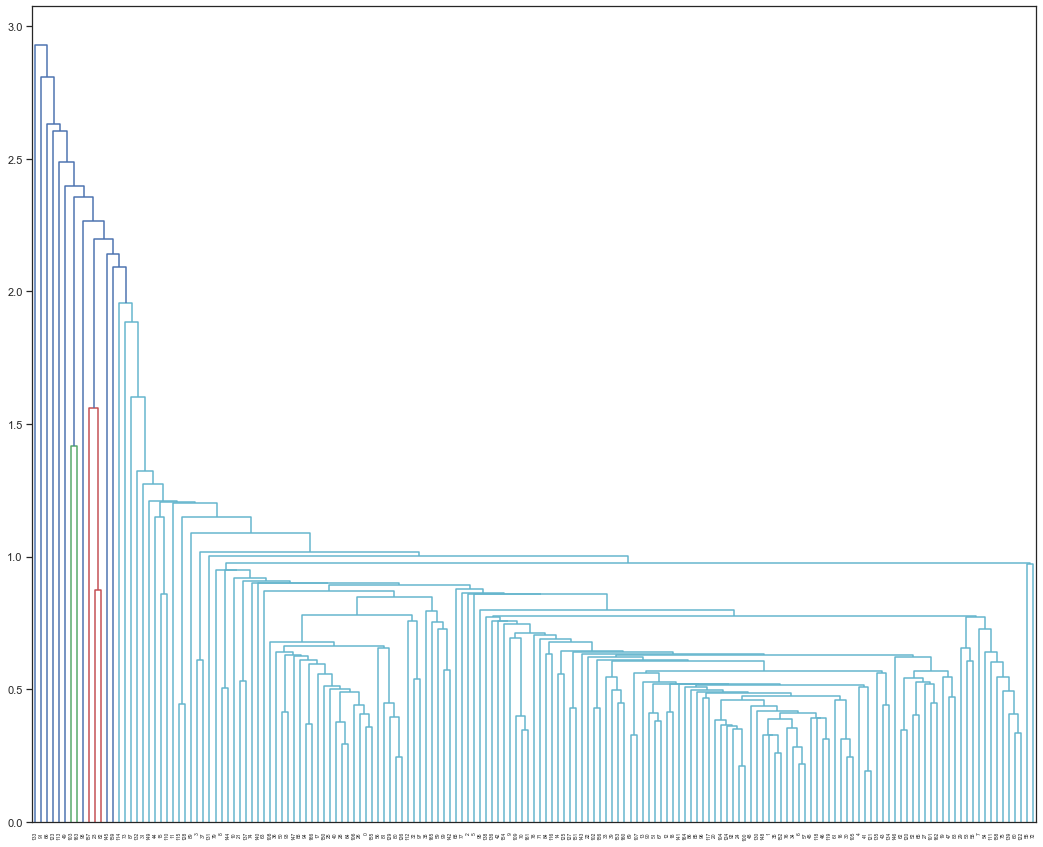

In [248]:
#single linkage
plt.figure(figsize=(18,15))
country_mergings=linkage(country_scaled,method="single",metric="euclidean")
dendrogram(country_mergings)
plt.show()

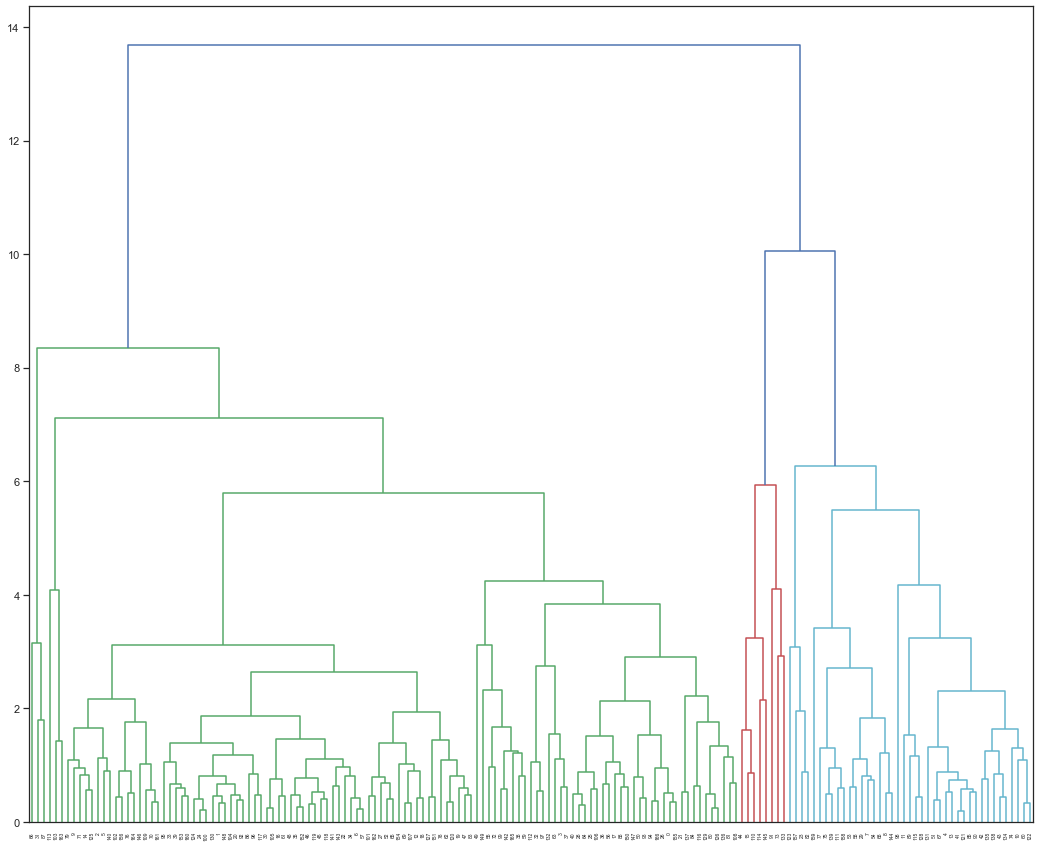

In [249]:
#complete linkage
plt.figure(figsize=(18,15))
country_mergings=linkage(country_scaled,method="complete",metric="euclidean")
dendrogram(country_mergings)
plt.show()

In [250]:
#getting number of clusters
cut_tree(country_mergings,n_clusters=3).shape

(167, 1)

In [251]:
# adding 'cluster_h_label' which is cluster_id according to hierarchical clustering to the main dataset
cluster_h_label=cut_tree(country_mergings,n_clusters=3).reshape(-1,)
country['cluster_h_label']=cluster_h_label
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_h_label
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,2,1


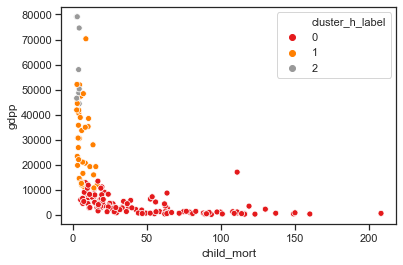

In [252]:
#analysing cluster so formed using scatter plot
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_h_label', data = country, palette = 'Set1')

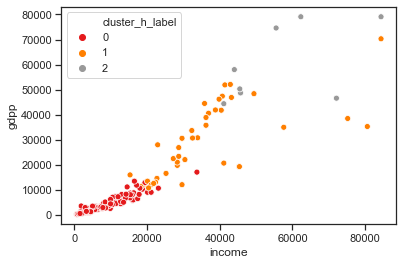

In [253]:
#analysing cluster so formed using scatter plot
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_h_label', data = country, palette = 'Set1')

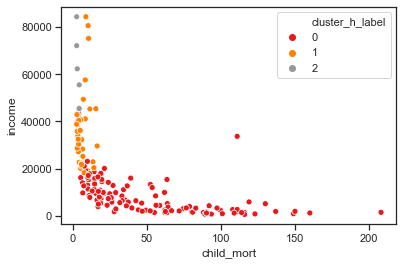

In [254]:
#analysing cluster so formed using scatter plot
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_h_label', data = country, palette = 'Set1')

In [255]:
#group the cluster so formed and determining mean
country.drop(['country','cluster_label'],axis = 1).groupby('cluster_h_label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_h_label,,,,,,,,,
0,51.512712,1466.113136,238.174746,1582.123729,7581.889831,9.187966,67.125424,3.425508,3732.322034
1,6.882927,13587.873171,2424.054156,11854.251220,35853.024390,3.313976,78.384634,1.811707,29492.682927
2,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.933750,1.727500,60097.000000


In [256]:
#cluster profiling where we are getting least five counytries with less gdp,less income, high child_mortality
country[country['cluster_h_label']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_h_label
66,Haiti,208.0,101.29,45.74,428.31,1500.0,5.45,32.1,3.33,662.0,0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0,0
32,Chad,150.0,330.10,40.63,390.20,1930.0,6.39,56.5,6.59,897.0,0,0
31,Central African Republic,149.0,52.63,17.75,118.19,888.0,2.01,47.5,5.21,446.0,0,0
97,Mali,137.0,161.42,35.26,248.51,1870.0,4.37,59.5,6.55,708.0,0,0


In [257]:
#cluster profiling where we are getting least five counytries with less gdp,less income, high child_mortality
country[country['cluster_h_label']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_h_label
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0,0


In [258]:
#cluster profiling where we are getting the countries having good gdp ,least child_mortality
country[country['cluster_h_label']==1].sort_values(by=['child_mort','income','gdpp'],ascending=[True,False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label,cluster_h_label
68,Iceland,2.8,22374.6,3938.60,18142.7,38800.0,5.470,82.00,2.20,41900.0,1,1
144,Sweden,3.0,24070.2,5017.23,21204.7,42900.0,0.991,81.50,1.98,52100.0,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800.0,0.351,80.00,1.87,46200.0,1,1
77,Japan,3.2,6675.0,4223.05,6052.0,35800.0,-1.900,82.37,1.39,44500.0,1,1
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700.0,-0.987,79.50,1.57,23400.0,1,1


In [259]:
#count the number of elements in each cluster.
country.cluster_h_label.value_counts()

0    118
1     41
2      8
Name: cluster_h_label, dtype: int64

#### So we find the the countries which are in direst need of aid are:

##### 1. Haiti
##### 2. Sierra Leone
##### 3. Chad
##### 4. Central African Republic
##### 5. Mali
##### 6. Burundi